# Trabajo práctico integrador - Análisis de datos

### Integrantes:
- Julio Agustín Donadello (a1505)
- Diego Braga (a1522)
- Eduardo Echeverria (a1516) 
- Marco Joel Isidro (a1520)
- Diego Sarina (a1519)


## Análisis exploratorio inicial

#### Dataset elegido: "Rain in Australia"

Preguntas interesantes para considerar aquí: 

- El objetivo es predecir si lloverá o no al día siguiente (variable RainTomorrow), en función datos meteorológicos del día actual

In [83]:
# Importacion de librerias necesarias 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
import scipy.stats as stats
import matplotlib.dates as mdates

In [54]:
# Carga del dataset y visualizacion
dataset = pd.read_csv('../dataset/weatherAUS.csv')

print(f"Dataset size: {dataset.shape}")
dataset.head()

Dataset size: (145460, 23)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Inicialmente el dataset contiene informacion de:
- Tiempo (date)
- Localizacion (region)
- Informacion meteorologica (rainfall, wind speed, Pressure, etc)

In [55]:
# Visualizo el tipo de informacion que contiene el dataset
print(f"Dataset info: \n{dataset.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

#### NOTA: 

- De la celda anterior, vemos que el dataset contiene informacion categorica (object) y numerica (int/float). Ademas de que a priori hay datos faltantes


In [56]:
# Busco por valores duplicados
print("Valores duplicados: ", dataset.duplicated().sum())

Valores duplicados:  0


#### Analisis de variables Numericas y Categoricas

##### Variables categoricas

In [75]:
dataset.describe(include=["object"])

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2013-11-12,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


In [76]:
print("WindGustDir:",dataset['WindGustDir'].unique())
print("Location:",dataset['Location'].unique())
print("RainToday:",dataset['RainToday'].unique())
print("RainTomorrow:",dataset['RainTomorrow'].unique())


WindGustDir: ['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' nan 'ENE' 'SSE' 'S' 'NW' 'SE'
 'ESE' 'E' 'SSW']
Location: ['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']
RainToday: ['No' 'Yes' nan]
RainTomorrow: ['No' 'Yes' nan]


In [77]:
# Selección de variables categóricas
categorical_features = dataset.select_dtypes(include=[object])

# Calcular la cardinalidad de cada variable categórica
for col in categorical_features.columns:
    cardinality = dataset[col].nunique()
    print(f"{col}: {cardinality}")


Date: 3436
Location: 49
WindGustDir: 16
WindDir9am: 16
WindDir3pm: 16
RainToday: 2
RainTomorrow: 2


###### NOTA IMPORTANTE

Podemos ver que de la celda anterior:

- tenemos informacion de 3436 fechas diferentes y de 49 regiones diferentes.
- el numero de variables asociadas con el viento es consistente (16)
- lo mismo con la lluvia (2)
- no hay variables categoricas con alta cardinalidad lo que es bueno.


--- 
A continuacion voy a analizar como esta distribuida las variable de salida (target) que representa la columna "RainTomorrow"

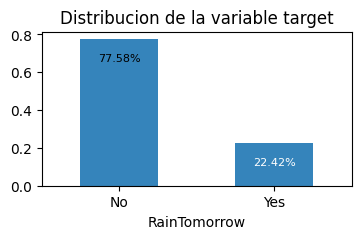

RainToday
No     0.775807
Yes    0.224193
Name: proportion, dtype: float64


In [78]:
# Visualizo la informacion del target ahora 

fig = plt.figure(figsize=(4, 2))
ax = dataset["RainTomorrow"].value_counts(normalize=True).plot(kind='bar', alpha=0.9, rot=0)

for idx, p in enumerate(ax.patches):
    color = 'black' if idx == 0 else 'white'
    ax.annotate(f'{p.get_height():.2%}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='top', 
                xytext=(0, -10), # ajusto la etiqueta
                textcoords='offset points',
                fontsize=8,
                color=color)
plt.title('Distribucion de la variable target')
plt.show()

print(dataset["RainToday"].value_counts(normalize=True))

###### Nota sobre la distribucion del target

De la celda anterior, vemos que existe un claro desequilibrio de clases que podría afectar el rendimiento de nuestro modelo. Este desequilibrio podria generar sesgos en las predicciones inclinandose a la clase mayoritaria.

---
A continuacion voy a buscar cual es la cantidad de datos por cada region tambien para evaluar de donde provienen los datos

In [79]:
count_per_region = dataset['Location'].value_counts()

# Calculo el porcentaje por region
percentage_par_region = (count_per_region / len(dataset)) * 100
percentage_par_region

Location
Canberra            2.362161
Sydney              2.298914
Darwin              2.195105
Melbourne           2.195105
Brisbane            2.195105
Adelaide            2.195105
Perth               2.195105
Hobart              2.195105
Albany              2.089922
MountGambier        2.089922
Ballarat            2.089922
Townsville          2.089922
GoldCoast           2.089922
Cairns              2.089922
Launceston          2.089922
AliceSprings        2.089922
Bendigo             2.089922
Albury              2.089922
MountGinini         2.089922
Wollongong          2.089922
Newcastle           2.089234
Tuggeranong         2.089234
Penrith             2.089234
Woomera             2.068610
Nuriootpa           2.068610
Cobar               2.068610
CoffsHarbour        2.068610
Moree               2.068610
Sale                2.068610
PerthAirport        2.068610
PearceRAAF          2.068610
Witchcliffe         2.068610
BadgerysCreek       2.068610
Mildura             2.068610
Norfo

Algunas regiones tienen más información que las otras. Esto puede deberse a problemas como falta de estaciones meteorológicas, etc

##### Variables numericas

In [82]:
# Variables numericas
dataset.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


**Datos Generales**
- Periodo de tiempo: Aprox 10 años (2007-11-01 00:00:00 - 2017-06-25 00:00:00)
- Rainfall (precipitacion): varía desde 0.0 mm hasta 371.0 mm. En promedio, la cantidad de lluvia registrada es de 2.36 mm. La desviación estándar de 8.48 mm sugiere que la cantidad de lluvia puede variar significativamente de un día a otro.

Consistencia de los Valores:
Los valores parecen consistentes con lo que uno esperaría para datos meteorológicos. Sin embargo, algunos valores se refieren a situaciones extremas que pueden requerir una investigación adicional para confirmar su exactitud.

**Nota sobre las Unidades Utilizadas**

- **Temperatures**: Medidas en grados Celsius (°C).
- **Rainfall**: Cantidad de lluvia expresada en milímetros (mm).
- **Evaporation**: Cantidad de agua evaporada durante un período, típicamente 24 horas, expresada en milímetros (mm).
- **Wind Speed:**: Medida en kilómetros por hora (km/h).
- **Humidity**: Porcentaje (%) de humedad relativa del aire.
- **Pressure**: Presión atmosférica medida en hectopascales (hPa).
- **Cloudiness**: Medida en una escala, típicamente de 0 a 9, que representa la cobertura nubosa.


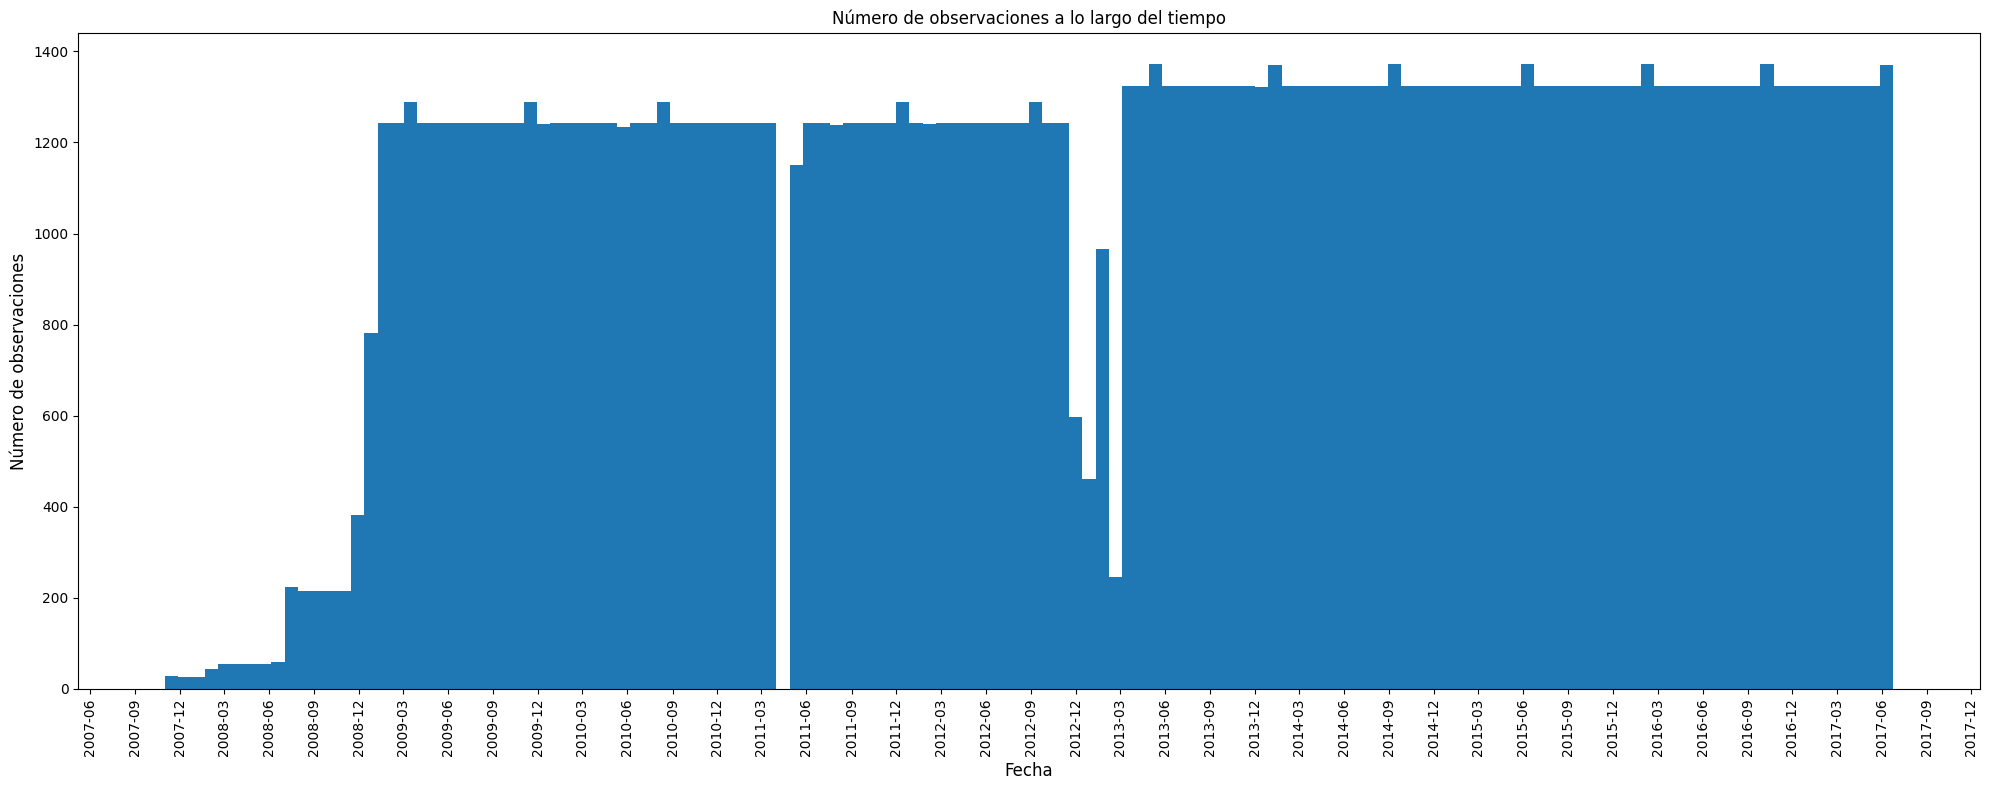

In [102]:
# Ajusto columna date a formato de fecha
dataset['Date'] = pd.to_datetime(dataset['Date'])

plt.figure(figsize=(20, 8))
plt.hist(dataset['Date'], bins=130)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m')) # mostrar el año y mes
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3)) # intervalo cada 3 meses
plt.xticks(rotation=90) # pongo las etiquetas a 90 para entren

ax = plt.gca()
plt.title('Número de observaciones a lo largo del tiempo', fontsize=12)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Número de observaciones', fontsize=12)
plt.tight_layout() # evitar solapamientos
plt.show()


**Analisis**

El numero de observaciones crece abrutamente a partir de marzo de 2009, y tambien veo una perdida de informacion en marzo 2011 y diciembre 2012 (aprox)

### Identificación del tipo de dato

# TODO: revisar lo deje incompleto

Utilizando información de las celdas anteriores, vamos a realizar la identificación de los tipos de datos:

- Variables Categóricas:
    - Date: Nominal. Representa fechas
    - Location: Nominal. Representa nombres de ubicaciones
    - WindGustDir: Nominal. Dirección del viento en ráfagas
    - WindDir9am: Nominal. Dirección del viento en ráfagas a las 9am
    - WindDir3pm: Nominal. Dirección del viento en ráfagas a las 3pm
    - RainToday: Nominal. Indica si llovió en el dia de "Hoy"
    - RainTomorrow: Nominal. Variable objetivo!

- Variables Numericas:
    - MinTemp: Continuo. Temperatura mínima del día
    - MaxTemp: Continuo. Temperatura máxima del día
    - Rainfall: Continuo. Cantidad de lluvia registrada
    - Evaporation: Continuo. Cantidad de evaporación (hmmm no estoy seguro de la traduccion)
    - Sunshine: Continuo. Horas de sol
    - WindGustSpeed: Continuo. Velocidad de ráfagas de viento
    - WindSpeed9am: Continuo. Velocidad del viento a las 9am
    - WindSpeed3pm: Continuo. Velocidad del viento a las 3pm
    - Humidity9am: Continuo. Humedad a las 9am
    - Humidity3pm: Continuo. Humedad a las 3pm
    - Pressure9am: Continuo. Presión a las 9am
    - Pressure3pm: Continuo. Presión a las 3pm
    - Cloud9am: Continuo. Nubosidad a las 9am (0-8)
    - Cloud3pm: Continuo. Nubosidad a las 3pm (0-8)
    - Temp9am: Continuo. Temperatura a las 9am
    - Temp3pm: Continuo. Temperatura a las 3pm

### Identificar las variables de entrada y de salida

- Variable de salida (target):

    - RainTomorrow: variable que se quiere predecir. Indica si lloverá al día siguiente
    
- Variables de entrada (features):

    - Date: Puede ser procesada para extraer características como mes, día, etc.
    - Location: Representa diferentes estaciones meteorológicas.
    - MinTemp: Temperatura mínima del día.
    - MaxTemp: Temperatura máxima del día.
    - Rainfall: Cantidad de lluvia registrada.
    - Evaporation: Cantidad de evaporación.
    - Sunshine: Horas de sol.
    - WindGustDir: Dirección del viento en ráfagas.
    - WindGustSpeed: Velocidad de ráfagas de viento.
    - WindDir9am: Dirección del viento a las 9am.
    - WindDir3pm: Dirección del viento a las 3pm.
    - WindSpeed9am: Velocidad del viento a las 9am.
    - WindSpeed3pm: Velocidad del viento a las 3pm.
    - Humidity9am: Humedad a las 9am.
    - Humidity3pm: Humedad a las 3pm.
    - Pressure9am: Presión a las 9am.
    - Pressure3pm: Presión a las 3pm.
    - Cloud9am: Nubosidad a las 9am.
    - Cloud3pm: Nubosidad a las 3pm.
    - Temp9am: Temperatura a las 9am.
    - Temp3pm: Temperatura a las 3pm.
    - RainToday: Indica si llovió hoy

In [105]:
# Procesamiento de los datos faltantes 

# variables numericas
print("Porcentaje de valores numericos faltantes:")
print((dataset.select_dtypes(include=['float64', 'int64']).isnull().mean() * 100).sort_values(ascending=False))

# variables categoricas
print("\nPorcentaje de valores categoricos faltantes:")
print((dataset.select_dtypes(include=['object']).isnull().mean() * 100).sort_values(ascending=False))


Porcentaje de valores numericos faltantes:
Sunshine         48.009762
Evaporation      43.166506
Cloud3pm         40.807095
Cloud9am         38.421559
Pressure9am      10.356799
Pressure3pm      10.331363
WindGustSpeed     7.055548
Humidity3pm       3.098446
Temp3pm           2.481094
Rainfall          2.241853
WindSpeed3pm      2.105046
Humidity9am       1.824557
WindSpeed9am      1.214767
Temp9am           1.214767
MinTemp           1.020899
MaxTemp           0.866905
dtype: float64

Porcentaje de valores categoricos faltantes:
WindDir9am      7.263853
WindGustDir     7.098859
WindDir3pm      2.906641
RainTomorrow    2.245978
RainToday       2.241853
Location        0.000000
dtype: float64


/var/folders/_8/39tyf_h90zs55k7vbcmmz6f40000gn/T/ipykernel_482/3644105646.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MissingPercentage', y='Feature', data=missing_data, palette='viridis')


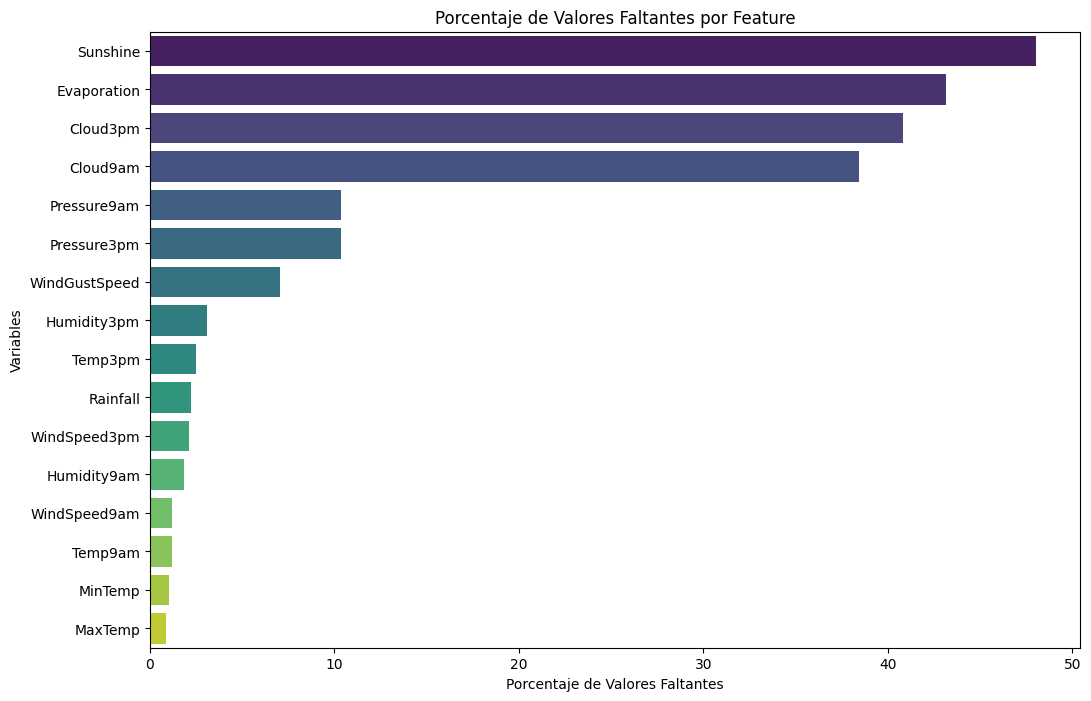

In [112]:
# Calculo el porcentaje de valores faltantes para cada columna
missing_values = dataset.select_dtypes(include=['float64', 'int64']).isna().sum()
missing_percentage = (missing_values / len(dataset)) * 100
missing_data = pd.DataFrame({'Feature': missing_values.index, 'MissingPercentage': missing_percentage})
missing_data = missing_data.sort_values(by='MissingPercentage', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='MissingPercentage', y='Feature', data=missing_data, palette='viridis')
plt.title('Porcentaje de Valores Faltantes por Feature')
plt.xlabel('Porcentaje de Valores Faltantes')
plt.ylabel('Variables')
plt.show()

**NOTA SOBRE VALORES FALTANTES**

La mayor parte de las variables numericas tienen un bajo porcentaje de valores perdidos. Sin embargo estas siguientes tiene valore que debemos notar:

- Sunshine         48.009762
- Evaporation      43.166506
- Cloud3pm         40.807095
- Cloud9am         38.421559
- Pressure9am      10.356799
- Pressure3pm      10.331363

Por otro lado las variables categoricas mas relevantes con perdidas de datos son:

- WindDir9am      7.263853
- WindGustDir     7.098859

**Analisis por region**

Puede que haya que analizar las variables por cada region porque vimos que habia un desbalance

In [119]:
# Análisis de valores faltantes por regiones
missing_data_percentage = dataset.groupby('Location').apply(lambda x: x.isnull().mean() * 100)

# Función para aplicar colores de fondo condicionales
def conditional_bg_color(val):
    red = min(255, int(2.55 * val))
    green = min(255, int(2.55 * (100 - val)))
    return f'background-color: rgb({red}, {green}, 0); color: black;'

missing_data_percentage.style.applymap(conditional_bg_color)





/var/folders/_8/39tyf_h90zs55k7vbcmmz6f40000gn/T/ipykernel_482/925039682.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_data_percentage = dataset.groupby('Location').apply(lambda x: x.isnull().mean() * 100)
/var/folders/_8/39tyf_h90zs55k7vbcmmz6f40000gn/T/ipykernel_482/925039682.py:10: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  missing_data_percentage.style.applymap(conditional_bg_color)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Location,,,,,,,,,,,,,,,,,,,,,,,
Adelaide,0.000000,0.000000,0.062637,0.093956,3.194488,46.633260,44.597557,0.814281,0.814281,8.581272,0.501096,0.156593,0.156593,0.156593,0.156593,0.250548,0.219230,100.000000,100.000000,0.156593,0.125274,3.194488,3.225806
Albany,0.000000,0.000000,2.072368,1.776316,0.789474,9.539474,17.105263,100.000000,100.000000,8.125000,25.756579,2.006579,24.111842,1.611842,23.552632,0.822368,0.822368,1.250000,23.388158,1.282895,23.421053,0.789474,0.789474
Albury,0.000000,0.000000,0.361842,0.361842,0.953947,100.000000,100.000000,1.052632,1.052632,17.269737,1.513158,0.296053,0.361842,0.296053,0.263158,0.164474,0.263158,57.598684,53.059211,0.296053,0.263158,0.953947,0.953947
AliceSprings,0.000000,0.000000,0.032895,0.065789,0.263158,7.072368,17.105263,1.677632,1.677632,7.565789,0.131579,0.065789,0.065789,0.098684,0.164474,0.032895,0.098684,10.986842,11.875000,0.000000,0.065789,0.263158,0.296053
BadgerysCreek,0.000000,0.000000,1.196411,0.963775,2.691924,100.000000,100.000000,2.525756,2.525756,14.456630,2.824859,1.628448,1.595214,1.794616,1.827850,5.583250,5.749418,100.000000,100.000000,1.362579,1.462280,2.691924,2.691924
Ballarat,0.000000,0.000000,0.032895,0.032895,0.394737,100.000000,100.000000,1.019737,1.019737,2.993421,0.592105,0.263158,0.131579,0.690789,0.230263,0.789474,0.855263,17.960526,34.473684,0.394737,0.197368,0.394737,0.394737
Bendigo,0.000000,0.000000,0.065789,0.164474,0.197368,61.019737,100.000000,1.348684,1.315789,8.026316,1.414474,0.131579,0.131579,0.230263,0.065789,0.493421,0.328947,31.842105,25.394737,0.098684,0.065789,0.197368,0.197368
Brisbane,0.000000,0.000000,0.281867,0.438459,1.002192,0.595052,1.534607,1.284059,1.284059,2.192296,1.064829,0.031319,0.250548,0.125274,0.469778,0.031319,0.250548,0.031319,0.062637,0.125274,0.469778,1.002192,1.002192
Cairns,0.000000,0.000000,0.032895,0.000000,1.710526,12.171053,15.657895,0.625000,0.592105,1.414474,0.131579,0.032895,0.032895,0.032895,0.000000,0.032895,0.000000,6.809211,7.565789,0.032895,0.000000,1.710526,1.710526


Observamos que los datos faltantes se concentran principalmente en regiones específicas

In [80]:
# Voy a buscar valores nulos en el dataset
dataset.isna().sum() #Obtengo por variable

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

>NOTA: Podemos ver que hay variables a tener en cuenta por la gran perdida de datos como:
- Evaporation
- Sunshine
- Cloud9am
- Cloud3pm

Con la informacion de la celda anterior, vemos que:

- Tenemos 3436 fechas unicas de 49 regiones diferentes. 

In [24]:
wind_related_columns = ['WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm']
rain_related_columns = ['Rainfall', 'RainToday', 'RainTomorrow']

# Verificación de valores nulos en variables relacionadas con el viento
print(dataset[wind_related_columns].isna().sum())

# Verificación de valores nulos en variables relacionadas con la lluvia
print(dataset[rain_related_columns].isna().sum())




WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
dtype: int64
Rainfall        3261
RainToday       3261
RainTomorrow    3267
dtype: int64
Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64


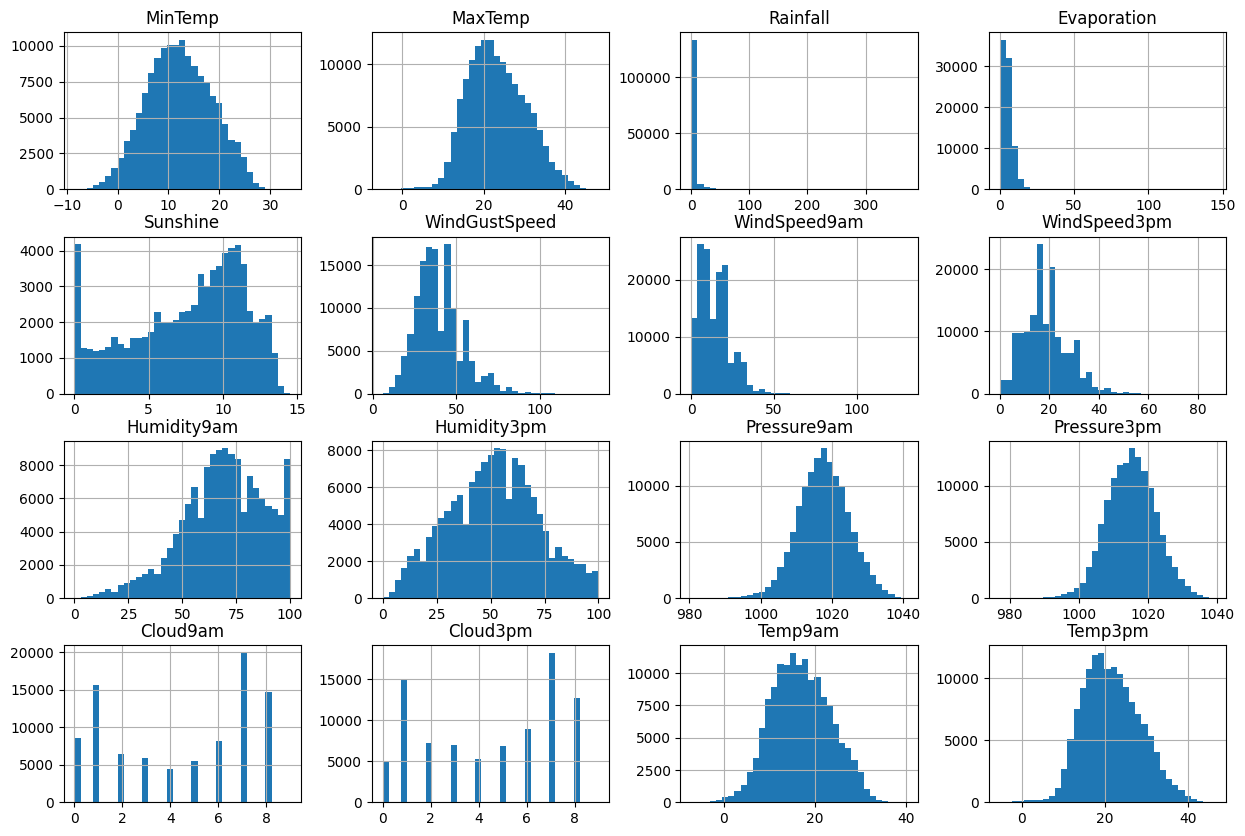

In [16]:
# Para las feature numericas analizo su distribucion
numeric_features = dataset.select_dtypes(include=[np.number])
numeric_features.hist(bins=35, figsize=(15, 10))
plt.show()


Observamos un desequilibrio de clases que podría afectar el rendimiento de nuestro modelado. Este desequilibrio puede generar sesgos en las predicciones, favoreciendo a la clase mayoritaria. Para solucionar este problema, tenemos que realizaremos un reequilibrio.


ADEMAS:
- voy a verificar cuanta informacion tengo por cada region! 